In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#class 1 data
df=pd.read_csv("Class1_.csv")
df.head(5)

,X,Y
0,-2.2365,2.3224
1,2.4445,4.5807
2,1.8720,1.1315
3,5.1338,1.0316
4,2.1731,2.2868


In [3]:
#class 2 data
df1=pd.read_csv("Class2_.csv")
df1.head(5)

,X,Y
0,8.2960,-15.5630
1,6.1743,-14.7910
2,8.6760,-17.5040
3,5.5962,-9.6617
4,5.3870,-10.5100


In [4]:
# ls1=[]
# ls1.append(df1[df1.columns[0]].min(axis=0))
# ls1.append(df[df.columns[0]].min(axis=0))
# ls2=[]
# ls2.append(df1[df1.columns[0]].max(axis=0))
# ls2.append(df[df.columns[0]].max(axis=0))
# ls3=[]
# ls4=[]
# ls3.append(df1[df1.columns[1]].max(axis=0))
# ls3.append(df[df.columns[1]].max(axis=0))
# ls4.append(df1[df1.columns[1]].min(axis=0))
# ls4.append(df[df.columns[1]].min(axis=0))
# ls3

<function matplotlib.pyplot.show(*args, **kw)>

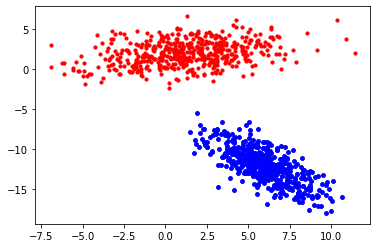

In [5]:
plt.scatter(df[df.columns[0]],df[df.columns[1]],s=10,c='r')
plt.scatter(df1[df1.columns[0]],df1[df1.columns[1]],s=15,c='b')
plt.show

In [6]:
#class1 adding 1
df['Z']=pd.Series(1,index=np.arange(500))
df.head(5)

,X,Y,Z
0,-2.2365,2.3224,1
1,2.4445,4.5807,1
2,1.8720,1.1315,1
3,5.1338,1.0316,1
4,2.1731,2.2868,1


In [7]:
#adding of 1 in last column for bias  class2
df1['Z']=pd.Series(1,index=np.arange(500))
df1.head(5)
df0=df1

In [8]:
#taking negative of data of class 2
df1=-df1
df1.head(5)

,X,Y,Z
0,-8.2960,15.5630,-1.0
1,-6.1743,14.7910,-1.0
2,-8.6760,17.5040,-1.0
3,-5.5962,9.6617,-1.0
4,-5.3870,10.5100,-1.0


In [9]:
#training data of class1
df2=df.sample(frac=.80)
df2.head(5)

,X,Y,Z
399,5.8757,1.97760,1
73,1.2926,2.18060,1
426,1.2372,0.60873,1
412,2.1437,1.24380,1
295,2.7407,1.89610,1


In [10]:
#test data of class1
ind1=set(df.index.values)
ind2=set(df2.index.values)
ind3=ind1.symmetric_difference(ind2)
df4=df.loc[ind3]
df4.head(5)

,X,Y,Z
2,1.87200,1.13150,1
9,-5.42570,0.87663,1
23,0.65642,1.88790,1
28,1.21700,1.27750,1
32,-2.40150,2.44030,1


In [11]:
#training data of class 2
df3=df1.sample(frac=.80)
df3.head(5)

,X,Y,Z
19,-4.7869,10.7090,-1.0
435,-6.5224,12.8070,-1.0
185,-9.4802,14.2650,-1.0
341,-3.1991,8.6637,-1.0
335,-6.3448,10.5390,-1.0


In [12]:
#test data of class2
ind1_=set(df0.index.values)
ind2_=set(df3.index.values)
ind3_=ind1_.symmetric_difference(ind2_)
df5=df0.loc[ind3_]
df5.head(5)


,X,Y,Z
1,6.1743,-14.791,1
4,5.3870,-10.510,1
12,7.4890,-14.901,1
30,4.7993,-11.509,1
35,5.3984,-10.942,1


In [13]:
# data frame including class 1 and class 2
D={}
lst=['X','Y','Z']
for k in range(3):
    lst1=df2[df2.columns[k]].tolist()+df3[df3.columns[k]].tolist()
    D[lst[k]]=lst1
Ds=pd.DataFrame(D)   
Ds.head(5)

,X,Y,Z
0,5.8757,1.97760,1.0
1,1.2926,2.18060,1.0
2,1.2372,0.60873,1.0
3,2.1437,1.24380,1.0
4,2.7407,1.89610,1.0


In [14]:
#finding of weighted vector to classify class 1 and class2
w=np.array([3,4,-5])
n=len(Ds[Ds.columns[0]])
i=0
lst=[]
print(n)
while i<n:
    s=np.dot(w,Ds.loc[i])
    lst.append(s)
    if s<0:
        w=w+.02*Ds.loc[i]
        i=0
    else:
        i=i+1
print(w)
print(i)

In [15]:
#finding of weighted vector to classify class 1 and class2
w=np.array([3,4,-5])
n=len(Ds[Ds.columns[0]])
k=0
lst1=[]
count=0
while k==0:
    i=0  
    lst=[]
    while i<n:        
        s=np.dot(w,Ds.loc[i])
        lst.append(s)
        if s<0:
            w=w+1*Ds.loc[i]
            i=0
            df=np.array(lst)
            lst1.append(np.sum(df))
            count=count+1
            lst=[]
            
        else:
            i=i+1
    if i==n:
        k=1
# print(len(lst1)) 
# print(count)
w

X    -0.08253
Y     3.86836
Z    13.00000
dtype: float64

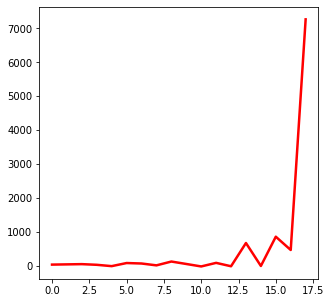

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
l=len(lst1)
x=np.arange(0,l)
plt.plot(x,lst1,color='r',linewidth=2.5)
plt.show()

In [17]:
# import numpy as np
# l=df4.index.tolist()
# m=df5.index.tolist()
# C11=0
# C12=0
# C=0
# C21=0
# C22=0
# for k in l:
#     s1=np.dot(w,df4.loc[k])
#     if s1>0:
#         C11=C11+1
#     elif s1<0:
#         C12=C12+1
#     else:
#         C=C+1
# for j in m:
#     s1=np.dot(w,df5.loc[j])
#     if s1>0:
#         C21=C21+1
#     elif s1<0:
#         C22=C22+1
#     else:
#         C=C+1        
# print(C11)        
# print(C12)
# print(C21)
# print(C22)

In [18]:
#findin of min and max value to define range for plotting
ls1=[]
ls1.append(df5[df5.columns[0]].min(axis=0))
ls1.append(df4[df4.columns[0]].min(axis=0))
ls2=[]
ls2.append(df5[df5.columns[0]].max(axis=0))
ls2.append(df4[df4.columns[0]].max(axis=0))
ls3=[]
ls4=[]
ls3.append(df5[df5.columns[1]].max(axis=0))
ls3.append(df4[df4.columns[1]].max(axis=0))
ls4.append(df5[df5.columns[1]].min(axis=0))
ls4.append(df4[df4.columns[1]].min(axis=0))
ls3

[-5.4926, 6.1355]

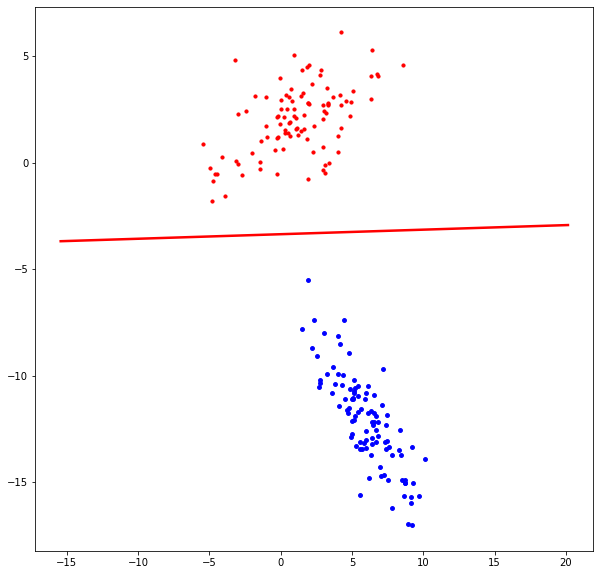

In [19]:
#classification of data
import matplotlib.pyplot as plt
import numpy as np
v1=min(ls1)-10
v2=max(ls2)+10
x=np.linspace(v1,v2,150)
slope = -(w[0]/w[1])  
intercept = -w[2]/w[1]

y=[]
for i in x:
    s=slope*i+intercept
    y.append(s)
plt.figure(figsize=(10,10))
plt.scatter(df4[df4.columns[0]],df4[df4.columns[1]],s=10,c='r')
plt.scatter(df5[df5.columns[0]],df5[df5.columns[1]],s=15,c='b')
plt.show    
plt.plot(x,y,color='red',linewidth=2.5)
plt.show()